# Notebook: 01 - Data Cleaning & Preprocessing

**1. Import Required Libraries**

In [1]:
import os
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from ctgan import CTGAN  # Correct import for latest ctgan package

**2. Define Paths and Ensure Directory Structure**

In [2]:
# Set base directory relative to the current file or working directory
project_root = Path.cwd().parent



In [3]:
# Define folder paths
raw_dir = project_root / "data" / "raw"
processed_dir = project_root / "data" / "processed"
synthetic_dir = project_root / "data" / "synthetic"



In [4]:
# Create folders if they don't exist
for folder in [raw_dir, processed_dir, synthetic_dir]:
    folder.mkdir(parents=True, exist_ok=True)



In [5]:
credit_df_path = raw_dir / "creditcard.csv"



**3. Load Datasets**

In [6]:
# Load the dataset or raise an error if the file is not found
if credit_df_path.exists():
    credit_df = pd.read_csv(credit_df_path)
    print("Dataset loaded:", credit_df.shape)
else:
    raise FileNotFoundError(f"File not found at: {credit_df_path}\n"
                            f"Please place 'creditcard.csv' in the folder: {raw_dir}")

Dataset loaded: (284807, 31)


**4. Display Basic Information of the Datasets**

In [7]:
# Displaying the first five rows of the Credit Card Fraud Detection dataset
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Displaiying the information of the Credit Card Fraud Detection dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- For Credit Card Fraud Dataset, all columns are numerical due to PCA transformation (V1-V28).

In [10]:
# Distributions of legitimate and fraudulent transactions
credit_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

As we can see, the dataset is highly imbalanced. 0 represents a Normal Transaction and 1 represents one that is Fraudulent.

In [11]:
# Separating the data into legitimate and fraudulent transactions
legitimate = credit_df[credit_df['Class'] == 0]
fraudulent = credit_df[credit_df['Class'] == 1]

In [12]:
legitimate.shape, fraudulent.shape

((284315, 31), (492, 31))

In [13]:
# Statistical measures of the legitimate transactions
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# Comparing the values for both legitimate and fraudulent transactions
credit_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Scaling the Amount Feature

In [16]:
scaler = StandardScaler()
credit_df['Amount'] = scaler.fit_transform(credit_df[['Amount']])

Applying SMOTE to create realistic synthethic samples by interpolating the minority samples

In [17]:
X_credit = credit_df.drop('Class', axis=1)
y_credit = credit_df['Class']


In [18]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_credit_res, y_credit_res = smote.fit_resample(X_credit, y_credit)

In [19]:

credit_df_balanced = pd.concat([X_credit_res, y_credit_res], axis=1)
print("Shape after SMOTE:", credit_df_balanced.shape)
print("New class distribution:\n", credit_df_balanced['Class'].value_counts())

Shape after SMOTE: (426472, 31)
New class distribution:
 Class
0    284315
1    142157
Name: count, dtype: int64


Using CTGAN to generate novel fraudulent samples to simulate new patterns

In [20]:
# Initialize CTGAN
ctgan = CTGAN()

In [21]:
# Train CTGAN on fraudulent transactions
fraudulent_data = credit_df[credit_df['Class'] == 1].drop(columns=['Class'])
ctgan.fit(fraudulent_data)


In [22]:
fraud_smote_count = credit_df_balanced['Class'].value_counts()[1]
fraud_needed = credit_df_balanced['Class'].value_counts()[0] - fraud_smote_count


In [23]:
# Generate synthetic fraud with CTGAN
synthetic_fraud = ctgan.sample(fraud_needed)
synthetic_fraud['Class'] = 1


In [24]:
# Save synthetic fraud
synthetic_fraud.to_csv(os.path.join(synthetic_dir, "credit_ctgan_fraud.csv"), index=False)
synthetic_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,17017.419570,3.147199,-4.870848,-1.110683,7.334984,-20.880025,-4.665997,-0.964361,-0.042631,-1.383571,...,2.690404,-1.678868,-0.223393,-0.966894,-0.406352,0.428915,1.361180,0.238818,1.039489,1
1,89231.999797,2.724029,5.119527,-6.403447,-2.665702,5.755187,-3.429919,-9.968983,2.291129,-5.912634,...,2.860654,0.456027,-0.446916,0.143680,-1.505728,0.260729,-0.192447,0.209533,1.199577,1
2,88692.496893,2.871344,3.686531,-8.512303,-0.548279,-2.106852,2.126336,-8.418038,-0.490514,-2.770674,...,3.062676,1.324241,0.400116,-0.113264,-1.547208,-0.548562,1.529457,0.001609,-0.257988,1
3,116025.520593,1.223669,0.959951,-6.340897,0.478550,4.669965,-0.459067,-14.837509,1.812214,-1.509522,...,14.497901,-2.388929,2.598894,-0.599917,-0.429011,0.789750,2.108985,-1.177203,0.835634,1
4,79841.848781,-8.347182,-0.519418,-9.150120,1.889669,-7.506296,-3.319334,-19.764918,-1.146645,-3.484076,...,0.528788,-0.042920,-0.384289,0.349133,-0.639001,-0.063118,0.506567,-0.019469,-0.322475,1


In [25]:
# Combine everything
credit_df_combined = pd.concat([credit_df_balanced, synthetic_fraud], ignore_index=True)
credit_df_combined.to_csv(os.path.join(processed_dir, "credit_combined_full.csv"), index=False)

# Final check
print("Final dataset shape:", credit_df_combined.shape)
print("Final class distribution:\n", credit_df_combined['Class'].value_counts())

Final dataset shape: (568630, 31)
Final class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


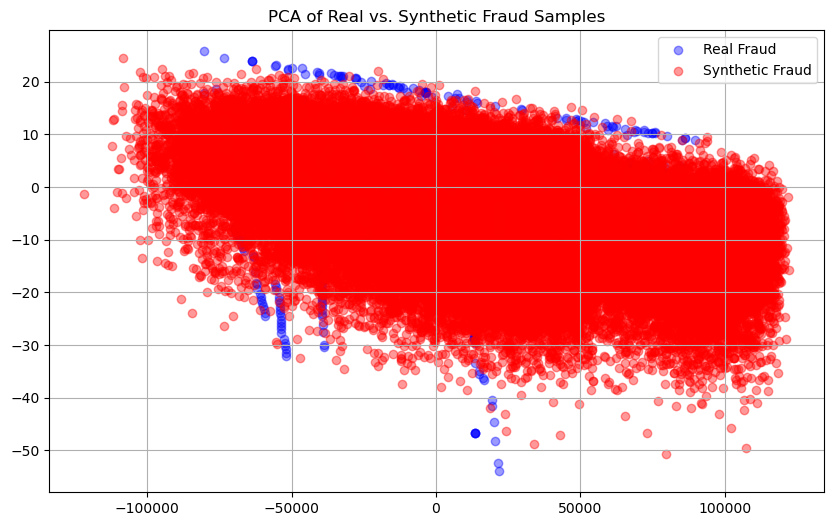

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

# Combine original and synthetic frauds
real_fraud = credit_df[credit_df['Class'] == 1].drop(columns=['Class'])
fake_fraud = synthetic_fraud.drop(columns=['Class'])

real_pca = pca.fit_transform(real_fraud)
fake_pca = pca.transform(fake_fraud)

plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], c='blue', alpha=0.4, label='Real Fraud')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], c='red', alpha=0.4, label='Synthetic Fraud')
plt.title('PCA of Real vs. Synthetic Fraud Samples')
plt.legend()
plt.grid(True)
plt.show()
